In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import sqlite3

In [57]:
pip install pandas --upgrade

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd

In [59]:
conn = sqlite3.connect("password_data.sqlite")
data = pd.read_sql_query("SELECT * FROM Users", conn)

In [60]:
data.shape

(100000, 3)

In [61]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


Remove index column as it is irrelevent

In [62]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [63]:
data.drop(['index'],axis=1, inplace=True) 

In [64]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


Find Duplicated values

In [65]:
data.duplicated().sum()

0

Check Missing Values

In [66]:
data.isnull().sum()

password    0
strength    0
dtype: int64

Now check for irrelevnt rows. If row is negative then it is irrelevent 

In [67]:
data['strength'].unique()

array([1, 2, 0])

In [68]:
data.columns

Index(['password', 'strength'], dtype='object')

In [69]:
data['password'][0]

'zxe870819'

Gives rows with password in numerical numbers 

In [70]:
data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [71]:
data[data['password'].str.isnumeric()].shape

(26, 2)

Having Upper values 

In [72]:
data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [73]:
data[data['password'].str.isupper()].shape

(1506, 2)

Having alpha values 

In [74]:
data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


Is alnum

In [75]:
data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [76]:
data[data['password'].str.isalnum()].shape

(97203, 2)

In [77]:
data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


Now go for punctuation 

In [78]:
data.head()


,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [79]:
import string 

In [80]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
def find_semantic(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [82]:
data['password'].apply(find_semantic)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

**Time for Feature Engineering**

In [83]:
data['length']=data['password'].str.len()

In [84]:
data.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


**Doing feature engineering for lower**

In [85]:
data['password'].str.lower()

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [86]:
password='zxe870819'

In [87]:
[char for char in password if char.islower()]

['z', 'x', 'e']

In [88]:
len([char for char in password if char.islower()])/len(password)

0.3333333333333333

In [89]:
def frequency_lower(row):
    return len([char for char in row if char.islower()])/len(row)

In [90]:
def frequency_upper(row):
    return len([char for char in row if char.isupper()])/len(row)

In [91]:
def frequency_numerical(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [92]:
data['frequency_lower']=data['password'].apply(frequency_lower)

In [93]:
data['frequency_upper']=data['password'].apply(frequency_upper)

In [94]:
data['frequency_numerical']=data['password'].apply(frequency_numerical)

In [95]:
data.head()

,password,strength,length,frequency_lower,frequency_upper,frequency_numerical
0,zxe870819,1,9,0.333333,0.0,0.666667
1,xw46454nr23l,1,12,0.416667,0.0,0.583333
2,soporte13,1,9,0.777778,0.0,0.222222
3,accounts6000webhost.com,2,23,0.782609,0.0,0.173913
4,c443balg,1,8,0.625000,0.0,0.375000


Adding special numbers 

In [96]:
def special_features(row):
    new=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            new.append(char)
    return len(new)
            

In [97]:
data['special_features']=data['password'].apply(special_features)/data['length']

In [98]:
data.head()

,password,strength,length,frequency_lower,frequency_upper,frequency_numerical,special_features
0,zxe870819,1,9,0.333333,0.0,0.666667,0.000000
1,xw46454nr23l,1,12,0.416667,0.0,0.583333,0.000000
2,soporte13,1,9,0.777778,0.0,0.222222,0.000000
3,accounts6000webhost.com,2,23,0.782609,0.0,0.173913,0.043478
4,c443balg,1,8,0.625000,0.0,0.375000,0.000000


Now we have to find the mean, median, e.t.c of different variables 

In [99]:
data[['strength', 'length']].groupby(['strength']).agg(["min", "max", "mean", "median"])


length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [100]:
cols=['length', 'frequency_lower', 'frequency_upper', 'frequency_numerical' , 'special_features']
for col in cols:
    print (col)
    print(data[[col, 'strength']].groupby(['strength']).agg(["min", "max", "mean", "median"]))
    print ('/n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
/n
frequency_lower
         frequency_lower                              
                     min       max      mean    median
strength                                              
0                    0.0  1.000000  0.708151  0.714286
1                    0.0  0.923077  0.630029  0.666667
2                    0.0  0.916667  0.424673  0.400000
/n
frequency_upper
         frequency_upper                              
                     min       max      mean    median
strength                                              
0                    0.0  1.000000  0.012873  0.000000
1                    0.0  0.923077  0.007915  0.000000
2                    0.0  0.888889  0.367636  0.428571
/n
frequency_numerical
         frequency_numerical          

In [101]:
Y=data.columns
Y

Index(['password', 'strength', 'length', 'frequency_lower', 'frequency_upper',
       'frequency_numerical', 'special_features'],
      dtype='object')

/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

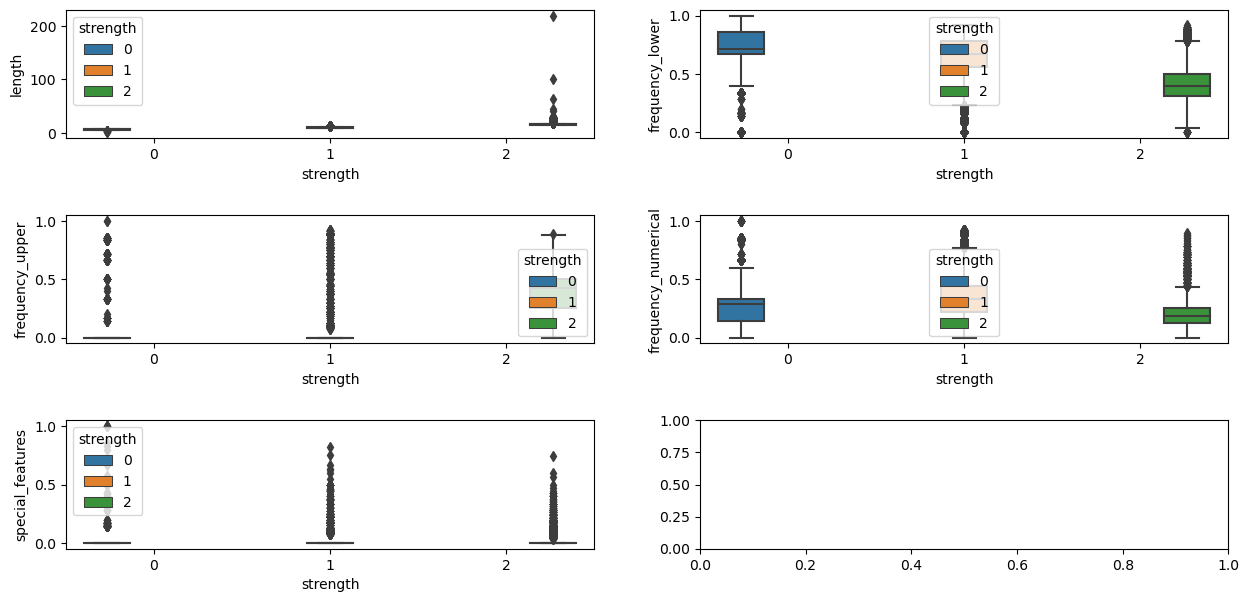

In [102]:
fig , ((ax1 , ax2) , (ax3 , ax4) , (ax5,ax6)) = plt.subplots(3 , 2 , figsize=(15,7))

sns.boxplot(x="strength" , y='length' , hue="strength" , ax=ax1 , data=data)
sns.boxplot(x="strength" , y='frequency_lower' , hue="strength" , ax=ax2, data=data)
sns.boxplot(x="strength" , y='frequency_upper' , hue="strength" , ax=ax3, data=data)
sns.boxplot(x="strength" , y='frequency_numerical' , hue="strength" , ax=ax4, data=data)
sns.boxplot(x="strength" , y='special_features' , hue="strength" , ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)


**Feature Importance Time**

Tell which feature is important for the Machine Learning model 

In [127]:
def get_dist(data, feature):
    figsize=(11,7)
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature, data=data)
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature], color='red', label='0', hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue', label='1', hist=False)
    sns.distplot(data[data['strength']==2][feature], color='green', label='2', hist=False)
    plt.legend()
    plt.show()

/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/wl/dmbrklm518xbqkv97kfhd3zc0000gn/T/ipykernel_76367/1089365259.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

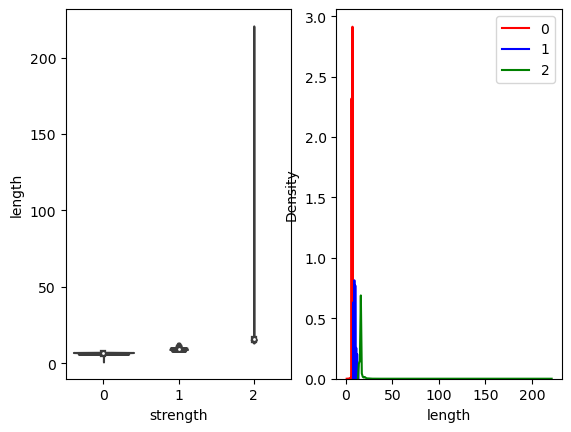

In [128]:
get_dist(data, 'length')

/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/wl/dmbrklm518xbqkv97kfhd3zc0000gn/T/ipykernel_76367/1089365259.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

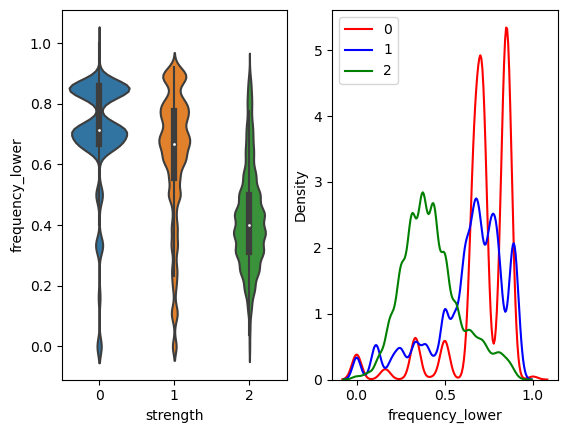

In [129]:
get_dist(data, 'frequency_lower')

/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/subi32/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/var/folders/wl/dmbrklm518xbqkv97kfhd3zc0000gn/T/ipykernel_76367/1089365259.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

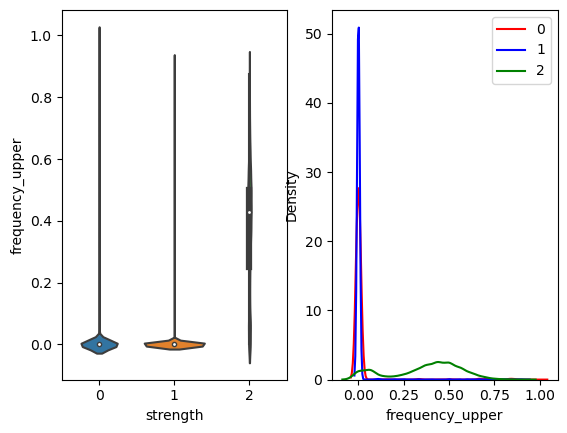

In [130]:
get_dist(data, 'frequency_upper')

**NLP Time**
converting the password into vector form, so password is easily readable 

**Computing TF-IDF**



To illustrate how to compute TF (Term Frequency) and IDF (Inverse Document Frequency), followed by multiplying these matrices, let's use a small example. Suppose we have a tiny corpus of three documents:

Document 1: "apple orange banana"
Document 2: "banana apple apple"
Document 3: "apple banana"
Step 1: Calculate TF (Term Frequency)
TF is calculated as the number of times a word appears in a document, divided by the total number of words in that document.

Document 1: 3 words in total.
TF(apple) = 1/3
TF(orange) = 1/3
TF(banana) = 1/3
Document 2: 3 words in total.
TF(apple) = 2/3
TF(banana) = 1/3
Document 3: 2 words in total.
TF(apple) = 1/2
TF(banana) = 1/2
Step 2: Calculate IDF (Inverse Document Frequency)
IDF measures the importance of a term. It's calculated as the logarithm of the number of documents divided by the number of documents that contain the word.

Total number of documents = 3
IDF(apple) = log(3/3) = log(1) = 0 (since 'apple' appears in all documents)
IDF(orange) = log(3/1) (appears in 1 document)
IDF(banana) = log(3/3) = log(1) = 0 (since 'banana' appears in all documents)
Step 3: TF-IDF Calculation
Multiply the TF by the IDF for each term.

Document 1:
TF-IDF(apple) = (1/3) * 0 = 0
TF-IDF(orange) = (1/3) * log(3) ≠ 0
TF-IDF(banana) = (1/3) * 0 = 0
Document 2:
TF-IDF(apple) = (2/3) * 0 = 0
TF-IDF(banana) = (1/3) * 0 = 0
Document 3:
TF-IDF(apple) = (1/2) * 0 = 0
TF-IDF(banana) = (1/2) * 0 = 0
Conclusion
In this example, 'orange' is the only term with a non-zero TF-IDF score in Document 1, implying it's unique to that document in this small corpus. The words 'apple' and 'banana', appearing in all documents, have a TF-IDF of 0, indicating they are common and less significant in distinguishing documents.

We have to make a vector form now 

In [107]:
#shuffle the data 
data1=data.sample(frac=1)

In [108]:
data1

,password,strength,length,frequency_lower,frequency_upper,frequency_numerical,special_features
70501,DtZr6Ojk2OQsEdHv,2,16,0.437500,0.437500,0.125000,0.0
93494,uhubuku969,1,10,0.700000,0.000000,0.300000,0.0
69205,playon123,1,9,0.666667,0.000000,0.333333,0.0
87004,837537sv,1,8,0.250000,0.000000,0.750000,0.0
76880,270707pa,1,8,0.250000,0.000000,0.750000,0.0
...,...,...,...,...,...,...,...
79179,CeFeGUpEtEw812,2,14,0.357143,0.428571,0.214286,0.0
94788,90xl740o,1,8,0.375000,0.000000,0.625000,0.0
80642,9qs7jkrwnenb,1,12,0.833333,0.000000,0.166667,0.0
11372,akwgsict687,1,11,0.727273,0.000000,0.272727,0.0


In [113]:
x=list(data1['password'])

In [123]:
x[0]

'DtZr6Ojk2OQsEdHv'

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [111]:
vectorizer=TfidfVectorizer(analyzer='char')

In [114]:
X=vectorizer.fit_transform(x)

In [116]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18092508, 0.        , 0.        ,
       0.        , 0.23734638, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.45367051, 0.17642174, 0.        , 0.        , 0.24306809,
       0.        , 0.2613148 , 0.23320341, 0.        , 0.        ,
       0.        , 0.37010553, 0.        , 0.28525678, 0.20060977,
       0.2051808 , 0.21356299, 0.        , 0.27221163, 0.        ,
       0.        , 0.        , 0.26802723, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [117]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [119]:
df2=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [120]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Machine Learning Deployment**

We have to divide the variables into dependent and independent variables. 

Dependent:Strength
Independent: Password(Vectors of Password), length, frequency_lower

In [133]:
#we are only choosing length and frequency_lower as they are the most useful 
df2['length']=data1['length']
df2['frequency_lower']=data1['frequency_lower']

In [134]:
df2.head()

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,frequency_lower
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.416667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.777778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.782609
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625000


In [157]:
 y=data1["strength"]

In [158]:
 from sklearn.model_selection import train_test_split

In [159]:
 X_train, X_test, y_train, y_test=train_test_split(df2, y, test_size=0.2)

In [160]:
 X_train.shape

(80000, 101)

In [161]:
y_train.shape

(80000,)

In [162]:
 from sklearn.linear_model import LogisticRegression

In [163]:
subi=LogisticRegression(multi_class='multinomial')

In [164]:
subi

LogisticRegression(multi_class='multinomial')

In [165]:
subi.fit(X_train, y_train)

/Users/subi32/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [167]:
y_pred=subi.predict(X_test)

In [169]:
from collections import Counter 

In [170]:
Counter(y_pred)

Counter({1: 17201, 2: 1567, 0: 1232})

**Prediction time BOYS**

In [171]:
password='subithegreat32'

In [173]:
sample_array=np.array([password])

In [176]:
sample_matrix1=vectorizer.transform(sample_array)

In [178]:
sample_matrix1.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20944886, 0.23458364, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.17434332, 0.29226552, 0.        ,
        0.        , 0.40847109, 0.        , 0.27674928, 0.28138905,
        0.21163836, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.23223695,
        0.23752862, 0.49446462, 0.25105472, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [179]:
sample_matrix1.shape

(1, 99)

In [187]:
length_password=len(password)

In [188]:
length_password

14

In [182]:
[char for char in password if char.islower()]

['s', 'u', 'b', 'i', 't', 'h', 'e', 'g', 'r', 'e', 'a', 't']

In [189]:
length_total=len([char for char in password if char.islower()])

In [190]:
length_total

12

In [185]:
len([char for char in password if char.islower()])/len(password)

0.8571428571428571

In [192]:
np.append(sample_matrix1.toarray(), (length_password, length_total)).shape

(101,)

In [198]:
new_matrix=np.append(sample_matrix1.toarray(), (length_password, length_total)).reshape(1,101)

In [199]:
subi.predict(new_matrix)

/Users/subi32/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

**Automation time**

In [207]:
# def pred():
#     input("Enter password: ")
#     sample_array=np.array([password])
#     sample_matrix1=vectorizer.transform(sample_array)
    
    
#     length_password=len(password)
#     length_total=len([char for char in password if char.islower()])/len(password)
    
#     new_matrix2=np.append(sample_matrix1.toarray(), (length_password, length_total)).reshape(1,101)
#     result=subi.predict(new_matrix2)
    
#     if result==0:
#         return 'Password is weak'
#     elif result==1:
#         return 'Password is normal'
#     else:
#         return 'Passowrd is strong'

In [209]:
import numpy as np

def pred(vectorizer, subi):
    password = input("Enter password: ")
    sample_array = np.array([password])
    sample_matrix1 = vectorizer.transform(sample_array)
    
    length_password = len(password)
    length_total = len([char for char in password if char.islower()]) / len(password)
    
    # Adding the additional features to the TF-IDF matrix
    additional_features = np.array([[length_password, length_total]])
    new_matrix2 = np.hstack((sample_matrix1.toarray(), additional_features))

    # Predicting the result
    result = subi.predict(new_matrix2)
    
    if result == 0:
        return 'Password is weak'
    elif result == 1:
        return 'Password is normal'
    else:
        return 'Password is strong'


In [211]:
result = pred(vectorizer, subi)

print(result)

Enter password:  subhan


Password is normal


/Users/subi32/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [212]:
result = pred(vectorizer, subi)

print(result)

Enter password:  32


Password is weak


/Users/subi32/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [213]:
result = pred(vectorizer, subi)

print(result)


Enter password:  _%%32Subhan


Password is weak


/Users/subi32/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Accuracy time Boys**

In [214]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
accuracy_score(y_test, y_pred)